# Co-citation network from the _Journal of Family History_ (1978-present)

This is the code for a co-citation semantic network, taking as data source all of the research articles in the _Journal of Family History_, 1978 to the present. Code for converting the imported data into NetworkX graphs and an interactive D3.js visualization was adapted from Neal Caren's blog post on this topic: http://www.unc.edu/~ncaren/cite_network_full/cites.html.

The first part of the notebook concerns the creation of the network graph. In the second part of the notebook, I ran a series of different metrics to examine the network in greater detail. In the third part of the notebook, I include some of the source code I had used, back when a previous version of NetworkX suppported a direct pipeline onto D3.js.

In [53]:
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
#Opening citation counts file

article_list=open('data/savedrecs-1.txt').read()
article_list=article_list.replace('\n   ','\t')
article_list=article_list.split('\n')
cite_list=[ab[3:] for ab in article_list if ab[:2]=="CR"]
cite_list=[[c for  c in cite.split('\t')] for cite in cite_list]

In [28]:
#Counting citations
cite_dict={}
edge_dict={}

for cites in cite_list:
    cite_list=[]
    for cite in cites:
        split=cite.split(', ')
        try:
            id=split[0].upper().replace(' ',' ').replace('.','')+' '+split[1]
            ids=id.split()
            for i in ids:
                if len(i)>2:
                    new=i[0].upper()+i[1:].lower() 
                    id=id.replace(i,new)
        except: 
            print ('Eror with ',split)
        else:
            
            if id not in cite_list:
                if id in cite_dict:
                    cite_dict[id]=cite_dict[id]+1
                else:
                    cite_dict[id]=1
                    
                if len(cite_list)>0:
                    for cite in cite_list:
                        if (id,cite) in edge_dict:
                            edge_dict[(id,cite)]=edge_dict[(id,cite)]+1
                        elif (cite,id) in edge_dict:
                            edge_dict[(cite,id)]=edge_dict[(cite,id)]+1
                        else:
                            edge_dict[(id,cite)]=1
                cite_list.append(id)
                print (id)

Anderson M 1971
Ryder NB 1965
Hajnal J 1953
Becker HS 1960
Berger BM 1971
Calhoun D H 1973
Carter H 1970
Coale AJ 1971
Coleman J 1961
Davis J Unpublished Paper
Demos J 1969
Elder G 1975
Flacks Richard 1971
Glick PC 1957
Glick PC 1965
Katz MB 1975
Keniston K 1972
Kett J 1973
Kett J 1971
Kett J 1974
*ma Bur Stat Lab 1887
Musgrove F 1965
Neugarten B L 1968
*pres Sci Adv Comm 1974
Riley M W 1969
Riley M W 1972
Ryder N 1974
Saveland W 1969
Uhlenberg PR 1969
Uhlenberp 1974
*us Bur Cens 1973
*us Bur Cens 1972
*us Bur Cens 1906
*us Dep Int Div 11 1896
Wells RV 1973
Wilensky H 1968
1845 Census City Boston
Aldous J 1969
Bengtson VL 1973
Balan J 1969
Erlanger HS 1974
Wilensky HL 1961
Hareven TK 1977
Ryder NB 1965
Berkner LK 1972
Spitzer AB 1973
Kahl JA 1955
Modell J 1976
Bailyn L 1970
Baltes PB 1973
Becker HS 1960
Berkner L K 1975
Bernard J 1971
Block J 1971
Blum Z 1969
Bogue DJ 1974
Bronfenbrenner U 1958
Carrhill RA 1973
Carter H 1970
Clausen JA 1972
Cottrell LS 1942
Cuisinier J 1977
Cutright P 

Berlanstein LR 1980
Davidoff L 1987
DE Vries J 1984
Finlay Roger 1981
Flinn M W 1981
Galloway PR 1985
Gillis R 1985
Hajnal J 1982
Hajnal J 1965
Henry L 1956
Hewitt M 1975
Houdaille J 1989
Knodel J 1976
Knodel J 1977
Knodel J 1967
Lees L H 1979
Levine D 1989
Levine David 1987
Lindemann M IN Press Patriots PA
Lynch KA 1988
Lynch KA 1986
Medick H 1981
Moch Leslie P 1983
Ohlin G 1961
Perrenoud A 1982
Perrot Jean-claude 1975
Poussou J-p 1983
Rappaport S 1989
Seccombe W IN Press J Hist Soci
Sewell JR W H 1985
Sharlin A 1978
Sharlin A 1981
Smith RM 1979
Smith RM 1984
Spagnoli PG 1983
Stone Lawrence 1977
Walker Mack 1971
Wall Richard 1983
Watkins S C 1986
Watkins SC 1981
Weir D 1984
Woods RI 1985
Wrigley EA 1985
Abelson A 1980
Abelson A 1979
Amorim MN 1984
Amorim MN 1973
Amorim MN 1980
Amorim Mnb 1983
Anelli A 1979
Angeli A 1979
Angeli A 1983
Gilmore DD 1982
Mintz SW 1950
Giovannini MJ 1981
Schneidej 1971
Cohn BS 1980
Hughes DO 1978
Iszaevich A 1981
Schneider P 1969
Arensberg Conrad 1940
Aymar

Smith Thomas C 1977
Smith TC 1969
Smith TC 1973
Smith Thomas C 1959
*tok IN 1882
Trewartha GT 1930
Tsuda H 1960
Wall R 1972
Wall Richard 1972
Wrigley EA 1981
Yamada S 1975
1936 Nagano Ken Cho Sonsh
Aleksandrov V A 1979
Aleksandrov VA 1976
Aleksandrov VA 1964
Plakans A 1975
Laslett P 1977
Atkinson D 1978
Czap P 1978
Czap P 1982
Den VE 1902
Dunn E 1978
Dunn PP 1977
Dunn SP 1978
Efimenko A 1884
Gaunt D 1982
Golovscikow KD 1889
Goody Jack 1976
Hajnal J 1965
Kabuzan V M 1963
Kosven MO 1963
Kovalevsky M 1891
Kula W 1972
Martynova A 1978
Melnikov N 1901
Mitterauer M 1979
Mitterauer M 1975
Mitterauer M 1982
Mitterauer Michael 1973
Mitterauer Michael 1976
Mitterauer Michael 1982
Plakans A 1976
Plakans A 1977
Plakans A 1978
Robinson RT 1949
Schneeweiss E 1935
Semevskij VJ 1903
Shinn WT 1961
Sieder R 1978
Smith R E F 1977
Vinski Z 1938
Von Haxthausen August 1847
Wall Richard 1972
Wheaton R 1975
*all Guttm I 1976
Card JJ 1978
Elder GH 1975
Baltes PB 1968
Moore KA 1977
Baldwin W 1976
Chilman C 1979

*ma Bur Stat Lab 1875
*ma Bur Stat Lab 1882
*ma Bur Stat Lab 1881
*ma Bur Stat Lab 1876
*ma Stat Board Hlt 1880
Maclaughlin VY 1971
Modell J 1977
Paquet Gilles 1964
Podea IS 1977
Rimbert S 1954
Ringuet 1940
Santerre R Unpub Peuple Son Rev
Trofimenkoff SM 1977
*us Bur Cens 1880
*us Bur Cens 1870
Vecoli RJ 1964
Vicero Ralph Dominic 1968
Walkowitz Daniel J 1978
Williamson JG 1974
Anderson WA 1953
Berheide CW 1976
Bailey I 1921
Blood Robert O 1960
Brownlee WE 1979
Byington Margaret F 1974
Clark MR 1930
DE Grazia S 1962
Frayser M 1930
Hill R 1930
Hopkins J 1941
Kirkpatrick EL 1929
Kneeland H 1932
Moore R 1930
Rankin JO 1928
Richardson J 1933
Ross Edward A 1922
Ross JE 1958
Sewell WH 1940
Tilly Louise A 1978
*us Bur Cens 1930
Vanek J 1977
Vanek J 1974
Ward F 1920
Wasson G 1930
Wilson M 1929
Wrigley EA 1977
Young M 1973
Alden D 1963
Hajnal J 1953
Antonil AJ 1967
Biraben JN 1972
Bluteau R 1721
Goubert P 1968
Helin E 1972
Laslett P 1972
Marcilio Maria Luiza 1974
Mathias Herculano Gomes 1969
Van

Brent Peter 1981
Brifault R 1931
Carroll Lewis 1971
Child G 1862
Child GW 1863
Colby V 1966
Coleridge S 1874
Coleridge ST 1971
Combe G 1834
Dally E 1864
Darwin C 1877
Darwin C 1959
Darwin E 1915
Darwin F 1888
Darwin G 1875
Darwin George 1873
Darwin GH 1875
Darwin L 1929
Davenport CB 1913
Elderton E 1907
Farber B 1968
Firth R 1970
Flugel JC 1939
Fox R 1967
Frazer James George 1918
Frazer JG 1910
Galsworthy J 1922
Gerin W 1981
Goody J 1983
Greenacre P 1955
Griggs L 1940
Hammick JT 1887
Hardy T 1966
Hudson D 1977
Hunt J D 1982
Huth AH 1877
Huth AH 1880
Huth AH 1887
King HD 1923
Lubbock J 1871
Ludlow J M 1981
Maine H 1886
Manning S 1979
Marett Robert D 1936
Mclennan JF 1873
Millgate Michael 1982
Mitchell A 1866
Mitterauer M 1982
Monsarrat Ann 1980
Oliphant M 1899
Pearson K 1900
Pearson K 1903
Pearson K 1930
Raglan L 1932
Ruskin J 1949
Shorter E 1975
Staugustine 1952
Stone L 1979
Strahan Sak 1891
Taplin GB 1970
Thackeray W 1972
Thomas Donald 1979
Tillon G 1983
Trollope A 1978
Trollope A 195

Bongaarts J 1983
Coale A 1986
Coale A 1973
Coale A J 1986
Coale AJ 1992
Davis K 1963
Dyson T 1985
Friedlander D 1993
Hajnal J 1982
Kintner HJ 1985
Knodel J 1986
Lesthaeghe R 1986
Levine David 1977
Mills J 1992
Okun BS 1994
Roberts E 1983
Singh S 1984
Smith RM 1981
Teitelbams 1974
Trussell J 1980
Watkins S C 1986
Wilson C 1986
Wilson C 1991
Wilson C 1984
Woods R 1983
Woods RI 1987
Wrigley EA 1981
Wrigley E A 1966
Alter G 1988
Anderson M 1971
Seccombe W 1990
Banks J A 1954
Boyer GR 1989
Burnett J 1984
Caldwell John C 1982
Crafts Nfr 1989
Friedland 1973
Gibson FA 1922
Goldin C 1981
Groneman C 1977
Guhl NL 1983
Haines M R 1979
Haines MR 1989
Haines Michael R 1979
Haines MR 1977
Keil TJ 1988
Kendall May 1913
Knodel J 1986
Levine David 1987
Lindert PH 1978
Litchfield RB 1978
Mason KO 1978
Mitchell BR 1962
Modell John 1978
Notestein F W 1945
Roberts E 1982
Routh G 1965
Rowntree B 1902
Saito Osamu 1979
Saul S B 1969
Teitelbaum M S 1984
Tilly LA 1979
Tilly LA 1976
Watkins Susan Cotts 1987
Woods

Turner BS 1982
Turner D 1729
Vickery A 1998
Walker Garthine 2003
Wear A 2000
Wiesner Merry 1998
Wilson L 1999
Wilson Lindsay B 1993
Wilson P 1999
Zemon N 1987
2002 His J
1723 Onania Heinous Sin S
Hirschman C 1984
Lichter DT 1992
Cherlin AJ 1999
Waite LJ 1995
Hirschman C 1990
Preston SH 1992
Ruggles S 1994
Tolnay SE 1997
Adelman RM 2001
Beck R 1996
Bodnar J 1983
Boyd RL 2001
Brandon PD 2002
Burton OV 1985
Cherlin A J 1992
Douglass F 1969
Dubois W 1899
Espenshade TJ 1985
Farley R 1971
Featherman D L 1978
Frazier EF 1932
Frazier EF 1939
Glazer Nathan 1964
Gordon M 1964
Gutman Herbert G 1976
Hammermesh DS 1998
Heer David M 1996
Hellwig DJ 1961
Henri F 1975
Hernandez D 1995
Hernandez D J 1999
Hutchinson Edward P 1981
*imm Nat Serv 1999
Johnson R 1981
Lammermepj 1973
Lieberson S 1980
Lieberson Stanley 1963
Martin J A 2002
Martin P 1999
Massey DS 1995
Mcdaniel A 1994
Mcdaniel A 1996
Mclanahan SS 1994
Miller A T 1994
Morgan S Philip 1993
Moynihan D P 1965
Pleck Elizabeth 1979
Rivera-batiz Fran

Goode W J 1963
Goody J 1983
Hoexter Miriam 1973
Hopkins N 1985
Lynch Katherine A 1982
Nimr I 1975
Rogers Mary Eliza 1862
Scholch A 1984
Stone L 1975
Stone L 1979
Andorka R 1986
Andorka Rudolf 1983
Plakans A 1975
Hammel EA 1980
Hammel EA 1974
Baric L 1967
Blum J 1978
Bohac RD 1985
Coale A J 1979
Czap P 1983
Czap P 1982
Czap P 1978
Fel E 1969
Fortes M 1969
Hajnal J 1965
Halpern J 1972
Halpern JM 1970
Halpern JM 1980
Halpern JM 1983
Hammel EA 1972
Hammel EA 1984
Hoch Steven 1986
Kuhk J 1982
Laslett P 1983
Macfarlane Alan 1970
Palli H 1980
Palli H 1983
Plakans A 1982
Plakans A 1984
Plakans A 1983
Pollock Linda A 1983
Segalen M 1983
Sklar J 1976
Smith Anthony D 1981
Verdon M 1979
Wall R 1983
Addams J 1909
Aldrich M 1980
Anderson M 1971
Modell J 1973
Modell J 1976
Bodnar John 1982
Bosworth Louise Marion 1911
Butler E 1910
Butler Elizabeth Beardsley 1909
Byington MF 1909
Clark Sue Ainslie 1911
Dinwiddie E 1904
Dublin T 1979
Early FH 1982
Eichengreen B 1984
Engels F 1942
Fayes H 1899
Fretz FK 

Hareven TK 1974
Harrington MA 1939
Hobsbawm Eric J 1983
Krause CA 1978
Lapolla G 1931
Lawrence S 1943
Levi C 1977
Mariano JH 1921
Mormino Gary Ross 1986
Nelli Humbert 1970
Orsi Robert A 1985
Pallavacini P 1937
Pancrazi G 1914
Rapp R 1979
Ricoeur P 1981
Rischin Moses 1962
Smith J 1985
Therborn G 1980
Thomas Piri 1974
Tilly Louise A 1982
Webster 1988
Weldon S 1982
Yansmclaughlin V 1971
Barclay G 1954
Barclay GW 1976
Buck John Lossing 1956
Carter A T 1984
Gamble Sidney D 1954
Kulp Daniel 1925
*kuo Shih 1937
Levy M 1968
Meer V 1968
Pasternak B 1983
Rosnow RL 1984
Skoggard I 1986
Smith Arthur H 1899
Smith P C 1983
*taiwan Gov 1946
Wolf A P 1980
Bertaux D 1982
Bouchard G 1977
Bouchard G 1984
Bouchard G 1985
Bouchard G 1981
Bouchard G 1983
Elder GH 1981
Hareven T 1978
Hareven TK 1978
Lapierreadamcyk E 1984
LE Play P G F 1884
Mendras H 1971
Pouyez C 1983
Reuband KH 1980
Trost J 1977
Uhlenberg P 1974
Vinovskis MA 1977
Aries P 1973
Aries P 1980
Aries P 1943
Aries Philipe 1965
Aries Philippe 1960

Lis C 1990
Lis C 1986
Livibacci M 1977
Logoyt A 1869
Lynch Katherine A 1988
Martindoisy F 1853
Neff M 1967
Palaja M 1988
Penot A 1843
Pierrard P 1991
Piette C 1993
Piette C 1992
Poissonneau R 1954
Poussou J-p 1983
Ranciere J 1981
Ratcliffe BM 1991
Ratcliffe BM 1994
Ratcliffe BM 1992
Roberts B 1978
Roche D 1981
Rogers N 1989
Scott James 1990
*secr Soc 1848
Segalen Martine 1981
Sewell W 1985
Shorter Edward 1977
Simon J 1861
*soc Char Saint RE 1844
*stat Fran 1872
*stat Fran 1864
*stat Franc 1868
*stat Franc 1859
*stat Gen Franc 1901
Steedman C 1994
Tilly LA 1976
Villeneuvebarge 1846
Villerme L-r 1840
Woods RI 1985
Wrigley E A 1981
Wrigley EA 1981
1844 Circulaire President
1860 B Soc Saint Vincent
1847 B Lois Royaume Franc
1860 Recherches Stat Vill
1858 Notice Oeuvre Evange
1851 B Lois Republique FR
1843 Rapport Oeuvre
Ogilvie SC 1992
Berkner LK 1972
Lynch KA 1991
Aston T 1965
Berenger J 1990
Blaschka A 1925
Blaschka A 1930
Boguska Maria 1985
Callova E 1989
Canova E 1992
Canova E 1987
DE 

Latham ME 2000
Levine N 1982
Mandelbaum Maurice 1971
Mango A 2004
Mardin S 2006
Nauck B 2008
Nisbet Robert 1969
Onis Ziya 1999
Ortayli Ilber 1994
Ozdalga Elisabeth 2005
Ozer Ilbeyi 2006
Rosenmayr L 1963
Sirman Nukhet 2007
Thomas G M 1987
Thornton A 2005
Thornton A 2008
Timur S 1972
Toros Aykut 2002
Turkish Statistical Institute 2006
Vergin N 1985
Wallerstein I 1991
Women For Women'S Human Rights (wwhr) 2005
Yurtkuran-demirkan S 2009
Zurcher 2005
Alter G 1988
Alter G 1991
Hill B 1993
Matthijs K 2010
Lynch KA 1991
Brandstrom A 1998
Brandstrom A 2000
Chesnais J -C 2000
Chotkowski Margaret 2006
Coale A 1986
Coppejans-desmedt H 1986
D'haeseleer P 1993
Decaigny S 2000
Dehauwere H Vergelijking Tussen
Dentith S 1998
Dierickx H 1957
Dupaquier J 1981
Engelen Theo 2003
Guttentag M 1983
Hajnal J 1965
Hannes J 1969
Hasquin H 1980
Head-konig Anne-lise 2000
Henry L 1979
Hohenberg P 1995
Janssens Angelique 1998
Jeuninckx K 1964
Kalmijn M 1995
Knodel J 1976
Knodel J 1977
Kok J 2006
Kruithof J 1964
Lamp

Antozzi I 1974
Bacci ML 1980
Balbo L 1984
Ballestrero MV 1979
Ballestrero MV 1967
Barbagli M 1988
Beccaria C 1965
Bortolotti Franca Pieroni 1963
Bortolotti Franca Pieroni 1974
Buttafuoco A 1988
Cardia C 1975
Degrand A 1976
Dellaperuta F 1979
Fabbri S 1933
Flora P 1983
Franchini S 1986
Gabba CF 1861
Galoppini AM 1980
Kertzer DI 1981
Macry P 1988
Manoukian A 1988
Merli S 1973
Montroni G 1988
Mozzoni AM 1871
Mozzoni AM 1865
Musso S 1988
Novelli CD 1984
Paci M 1987
Piva I 1982
Poni 1982
Puccini S 1976
Raicich M 1987
Rocco A 1935
Saraceno C 1988
Saraceno C 1979
Saraceno C 1982
Scaraffia L 1988
Scaramuzza E 1983
Severini PS 1975
Ungari P 1970
Woolf S J 1988
Zanetti DE 1972
Albera D 1988
Alter G 1988
Anelli A 1979
Anelli V 1985
Aosta F 1984
Bacci ML 1977
Barbagli M 1984
Barbagli M 1987
Beigno F 1989
Beltrami D 1967
Benetti A 1983
Bigi P 1981
Bobbioni MT 1983
Buguiere A 1986
Burns R K 1963
Capra C 1984
Cattini M 1988
Cole J W 1974
Cole JW 1977
Comba R 1983
Conti GM 1958
Corsini CA 1969
Corti P

Vogel U 1992
Weberwill S 1983
Wiesner M E 1993
Wiltenburg J 1992
1907 Stat JB Dtsch Reich
Bhat M 1984
[anonymous] 1983
Preston SH 1992
Bumpass L 1989
Coale A J 1983
Glover J W 1921
Graham SN 1980
Hill K 1977
Jacobson PH 1959
Kramarow EA 1992
*mn U Soc Hist Res 1990
Preston S H 1991
Preston SH 1979
Preston S H 1980
Preston SH 1990
Smock PJ 1990
Strong MA 1989
*us Bur Cens 1910
*us Bur Cens 1925
*us Bur Cens 1909
*us Bur Cens 1908
*us Bur Cens 1913
*us Cens Bur 1892
*us Nat Ctr Hlth S 1973
Shorter E 1971
Schellekens J 1995
Crafts Nfr 1982
Feinstein C 1988
Friedlander D 1993
Friedlander D 1992
Hollingsworth TH 1981
Hunt E H 1973
Kok K 1991
Laslett P 1980
Lee C 1979
Mitchell BR 1988
Mokyr J 1988
Oeppen J 1980
Pindyck R S 1976
Robin J 1986
Robin Jean 1987
Samuel Raphael 1975
Smout Christopher 1980
Teitelbaum M S 1984
Tilly LA 1976
Weeks J 1981
Williamson J 1985
Coleman JS 1993
Preston SH 1984
Bumpass LL 1990
Rindfuss RR 1990
Oppenheimer VK 1994
Devries J 1994
Easterlin RA 1991
Lesthaeghe R 

Cubitt T 1973
Elben JE 1974
Elben JE 1972
Engerman SL 1978
Farley R 1965
Gudeman S 1979
Gutman Herbert G 1976
Gutman HG 1977
Kiple KF 1977
Modell J 1979
Neimeijer R 1973
Rutman DB 1980
*S Car Hist Soc 1834
Smith DS 1979
Steckel R 1979
*U N Car 1776
*U Virg Lib 1810
Wrigley EA 1968
Zelnik M 1966
Blassingame John W 1972
Casey AE 1957
Covert JR 1912
Cutwright P 1972
DU Bois W E B 1908
Dyer Frederick H 1908
Elkins S M 1959
Evans R 1962
Fogel Robert W 1974
Fogel RW Time Cross
Frazier E F 1939
Gates Paul Wallace 1960
Genovese Eugene 1974
Gray LC 1933
Gutman Herbert G 1976
House AV 1954
Moody VA 1924
*ms Dep Arch Hist Georg Pion Earl Marr
Phillips Ulrich B 1918
*sc Hist Soc JH Hamm Plant Man
Stampp Kenneth 1956
Steckel RH 1981
Sutch Richard C 1975
Tietze C 1960
Trussell J 1978
Eror with  ['BRUNSWICK COUNTY VIR']
Coale AJ 1971
Duze MC 1977
Glick PC 1977
Glick PC 1965
Gutmann M P 1978
Lesthaeghe R 1977
Mcneil DR 1976
Menken J 1977
Ryder NB 1975
Schoen R 1975
Schoen R 1974
Tukey J W 1977
Uhlenbe

Macfarlane G 1978
Rheinstein M 1947
Rheinstein M 1971
Riehl HW 1939
Rotering P 1986
Schwarz R 1988
Shammas C 1987
Shapo H 1993
Spring E 1993
Stoker H 1971
Sussman M B 1970
Tetiwa W 1975
Tillion G 1983
Tilly R 1971
Vonamira K 1977
Wagner H 1938
Watson A 1974
Adye J 1895
Alton G 1870
Temmerman M 2000
Mirza NM 1997
Levine P 1996
Deschryver A 1990
Herring DA 1998
Bryder L 1998
Dwork D 1987
Moring B 1998
Loudon I 1986
Genc M 2000
Hart N 1998
Conde-agudelo A 2000
Sawchuk LA 1998
Antini JB 1874
Atkins PJ 1992
Baly 1855
Barlette WJ 1864
*barr Hosp Impr CO 1863
Beaver MW 1973
Boureau Edouard 1952
Bourgeoispichat J 1951
Bourgeois-pichat J 1951
Bourgeois-pichat J 1950
Bourgeois J 1946
Bourgeois-pichat J 1952
Brend WA 1916
Chervin LT 1830
Collins R 1886
Cox JP 1877
Elkington HP 1901
Fawkes AW 1893
Flood FS 1866
Friedlander D 1985
Gruenwald P 1969
Guha S 1994
Guha S 1993
Hamer WS 1970
Hennen John 1830
Jackson W F 1987
Jackson William Godfrey Fothergill 1990
Ker JE 1863
Knodel J 1977
Koskiniemi M 19

Bakhtin MM 1970
Bastide R 1966
Bautier RH 1959
Belmont Nicole 1973
Berce Yves-marie 1976
Billot C 1975
Brissaud Yves-b 1972
Burguiere A 1972
Chaunu P 1972
Cohen G 1951
Coleman ER 1974
Davis Natalie Zemon 1975
Davis NZ 1971
Desportes P 1966
Detienne M 1970
DU Cange C 1883
Dubled H 1959
Duby Georges 1973
Duby Georges 1964
Ducange C 1887
Dufail N 1585
Flandrin JL 1972
Flandrin JL 1974
Flandrin J-l 1969
Gelin H 1910
Geremek Bronislaw 1976
Glorieux P 1969
Guademet J 1963
Haskell Ann S 1973
Jannet P 1855
Jean-claude Aubailly 1976
Jeay M 1977
Kasprzk K 1970
Kelly H A 1975
Leroy LE 1974
Leroy LE 1975
Leroy LE 1973
Leroy LE 1967
Leroy LE 1969
Levi-strauss C 1969
Levi-strauss C 1964
Lorcin MT 1975
Marrou HI 1961
Metz R 1962
Molin JB 1975
Montaiglon A 1854
Montaiglon A 1855
Neff TL 1900
Noonan John 1973
Payen JC 1977
Petot P 1962
Philippe Delhaye 1951
Pounds Njg 1969
Reau L 1959
Riquet 1949
Roques M 1936
Rossiaud J 1976
Rychner J 1967
Sweetser P 1966
Tabourotdesaccoe 1614
Van Gennep Arnold 1937
V

Inger G 1997
Inglehart R 2000
Janson J 1964
Kuchenbuch L 1977
Lettmann Reinhard 1967
Mayali L 1990
Meulenberg L 1965
Michaelis K 1989
Noonan J T 1968
Tellenbach Gerd 1993
Tottie L 1990
Troje HE 1995
Ullman W 1955
Walin G 1990
1839 Underdanigt Betankan
[anonymous] 1999
Basedow Jurgen 2000
Calloun C 1993
Forder C 1999
Henson D 1993
Hirschfeld Magnus 1904
Lajoie A 1998
Mecary C 1997
Nielsen L 1990
Rigaux F 1971
Rigaux F 2000
Wacke A 1990
1993 Z Gesamte Familienre
Barton MF 2003
Bernstein George 1986
*char Org Soc 1869
Churchill W 1906
Clarke P 1996
*cos 1912
*cos 1917
*cos 1913
*cos 1921
*cos 1918
*cos 1920
*cos 1919
*cos 1909
*cos 1910
Crowther AM 1983
Daunton MJ 1996
Dwork D 1987
Freeden M 1978
George DL 1914
Haybourne K 1995
Horstfall TC 1904
Leeson C 1917
Lewis J 1995
Mowatt CL 1961
Murray SL 1905
*nat Counc Unm Mot 1918
Peel DC 1933
Prochaska F 1998
Reid H 1923
Roof M 1972
Rowntree BS 2001
Stevenson J 1991
Stjohn J 1912
*summ Ass 1918
Thane P 1996
Treveylan C 1969
Urwick Edward Johns

Commissaire S 1888
Conzett V 1929
Courmeaux E 1891
Darnton R 1986
Dumay JB 1976
Fishman S 1970
Flandrin J L 1979
Foucault Michel 1978
Gay P 1984
Gerisch A 1918
Gestrich A 1986
Gillis J R 1985
Gillis JR 1981
Goulemot Jean-marie 1981
Guehenno J 1961
Henrey M 1953
Hoelz Max 1930
Kaisen W 1967
Lee WR 1977
Lundgreen P 1988
Lynch KA 1988
Mclaren Angus 1983
Medick H 1984
Menetra 1982
Nadaud M 1976
Neuman RP 1972
Offen K 1984
Pauk F 1930
Phayer JM 1974
Richter O 1919
Sansgene M 1979
Schulte Regina 1984
Shorter E 1976
Shorter E 1973
Sieder Reinhard 1982
Stone Lawrence 1977
Taylor T 1988
Tilly LA 1976
Turek L 1980
Voilquin S 1978
Walkowitz Judith R 1980
Weeks J 1981
1908 Kampf Ums Dasein
1910 Dulden Lebensbeschre
Annandale N 1905
Gaunt D 1987
Bjorkvik Halyard 1956
Bjornsson G 1957
Bjornsson L 1972
Burton R 1875
Chadwick HM 1905
Drake M 1969
Gaunt D 1978
Gaunt D 1977
Gill AP 1978
Gjerset K 1915
Gudbjartsson G 1972
Gunnarsson Gisli 1983
Gunnlaugsson G A 1988
Habakkuk H 1972
Hajnal J 1965
Harshberg

Mcadams Dan P 1998
Mondak Jeffery J 2010
Nash Catherine 2002
Rosenzweig Roy 1998
Rusen Orn 2006
Samuel Raphael 1994
Seixas Peter 2004
Stone Elizabeth 2008
Straub 2005
Thane Pat 2010
Welzer Harald 2002
White Richard 1999
Wolff Francois-charles 2005
Zeitlin Steve 1982
Zuckerman M 2000
Aguirre Carlos 2001
Allen Ann Taylor 1991
[anonymous] 1931
Carey D 2010
[anonymous] 1927
[anonymous] 1877
[anonymous] 1945
[anonymous] 1936
[anonymous] 1933
[anonymous] 1937
[anonymous] 1942
[anonymous] 1889
[anonymous] 1996
Deutsch SM 1991
Guy DJ 1998
Archetti Eduardo P 1997
Bliss K E 2007
Bliss Katherine 2001
Blum Ann 2003
Blum AS 1998
Blum Ann S 2009
Blum AS 2007
Bossen Laurel Herbenar 1984
Buffington Robert 1999
Bunzel Ruth 1967
Carey JR David 1998
Carey JR David 2006
Carey JR David 2013
Carmack Robert 1995
Carmack Robert M 1990
Caulfield Sueann 2005
Caulfield Sueann 1993
Chambers Sarah C 1999
Christiansen Tanja 2004
Dge 1924
Diaz 1986
Diaz Arlene 2004
Diaz Arlene 2001
Direccion General DE Estadistica (

Santrock JW 1998
Savonaventura C 2004
Savonaventura C 1995
Savonaventura C 2003
Scott E Invisible People Pro
Shepard Meanings Manhood
Shepard A 2003
Speechley HV 1999
Spiteri SC 2005
Vella AP 1962
Ventura CS 1999
Wilkie LA 2002
Wilson A 1980
Zaragoza MS 1995
Zondadari MA 1724
Silverman DJ 2005
Cogley RW 1999
Eliot J 1655
Eliot J 1647
Eliot J Communication
Gookin D 1792
Kawashima Y 1986
Leehaskins G 1960
Main GL 2001
O'brien Jean M 1997
Pierce RD 1961
Plane Ann Marie 2000
Richtert DK 2001
Romero Colonizing Childhood
Romero T 2007
Ronda JP 1977
Shammas C 1995
Shepard T 1647
Shepard T 1648
White R 1995
Williams R 1973
Aiken C 1855
Neff C 1997
Armstrong F 1988
Bagnell K 1976
Blackburn Childrens Friend Soc
*bpp Iups Emigration
Bradlow 1939
Bradlow E 1984
Burns RJ Dict Canadian Biogra
Cattermole W 1831
*cfs 5 Cfs
*cfs 4 Cfs
*cfs 1937
*cfs 1936
*cfs 1833
*cfs 6 Cfs
Cockburn Wsr 1838
Cowan HI 1961
Crawford J 1855
Dowd M 1849
Fraser A 1934
Green MA 1869
Guillet EC 1948
Hance EN 1883
Jameson AB 

Bertolini VJ 1996
Smith DS 1973
Aries P 1979
Aries Philippe 1962
Barkerbenfield GJ 1976
Barnes AE 1989
Braude A 1989
Carnes MC 1989
Carroll BE 1997
Clawson MA 1989
Cott N F 1977
Cott NF 1978
Degler CN 1980
Demos J 1982
Douglas A 1977
Douglas Ann 1974
Finkelstein B 1985
Fischer DH 1978
Fliegelman Jay 1982
Frank 1995
Frank SM 1998
Gordon Michael 1980
Greven P 1977
Griswold R 1993
Griswold RL 1982
Henretta James A 1973
Jeffrey Kirk 1972
Johansen SP 1994
Kerber L 1976
Kerber Linda K 1980
Kimmel MS 1994
Kimmel Michael 1996
Laipson P Thesis U Michigan
Lewis J Social Hist Issues H
Lystra Karen 1989
Marsh Margaret 1990
Mcdannell 1978
Mcdannell C 1986
Mcloughlin WG 1975
Mintz S 1988
Mintz S 1985
Morgan Edmund S 1966
Nelson C 1995
Norton MB 1980
Osterud Nancy Grey 1991
Rotundo EA 1985
Rotundo EA 1993
Ryan M 1982
Shea DB 1968
Sklar Kathryn Kish 1973
Slater Peter Gregg 1977
Smith-rosenberg Carroll 1985
Spacks P 1976
Stearns Peter 1986
Stone Lawrence 1977
Strickland C 1960
Vance Norman 1985
William

Foucault 1993
Foucault 2003
Foucault Michel 2003
Foucault Michel 2002
Foucault Michel 1993
Hendrick Harry 2003
Hojer Karl J 1965
Hultstrand Barbro 1962
Inghe Gunnar 1968
Isberg 1959
Isberg Harald 1959
Jonsson Gustav 1967
Jonsson Gustav 1971
Jundell Isak 1929
Jundell Isak 1942
Kalvesten 1973
Kalvesten Anna-lisa 1973
Key Ellen 1900
Lindhagen Anna 1931
Lofgren Orvar 1979
Lundqvist Asa 2007
Lundstrom 1993
Lundstrom Tommy 1993
Puranen BI 1984
Sallnas Marie 2000
Sandin Bengt 2003
Skold Johanna 2006
[socialstyrelsen The Swedish National Board OF Health And Welfare] 1961
Socialstyrelsen [the Swedish National Board OF Health And Welfare] 1961
Soderlind Ingrid 1999
Sommer Dion 2005
Spock Benjamin 1950
Statens Offentliga Utredningar (sou) [swedish Government Official Reports] 1974
Steenhoff Gotthilf 1936
Steenhoff Gotthilf 1931
Steenhoff Gotthilf 1939
The National Board OF Health And Welfare 1961
Thelen T 2010
Vinterhed Kerstin 1981
VK The Child Welfare Board OF Vaxjo 1932
VK The Social Central B

Graham Sandra Lauderdale 1998
Graham Sandra Lauderdale 2002
Graubart Karen 2007
Graubart Karen 2013
Gutierrez Ramon 1991
Harth-terre Emilio 1971
Heywood LM 2007
Hunefeldt 1995
Hunefeldt Christine 1995
Juan Jorge 1748
Graham SL 2003
Lavrin Asuncion 1998
Lipsettrivera S 2012
Lockhart James 1994
Martin Jrj 2007
Martinez Maria Elena 2008
Mckinley Michelle 2010
Mckinley MA 2014
Medina 2002
Medina Diego Levano 2002
Melchor Ciro Corilla 2002
O'toole Rachel 2012
Osorio Alejandra B 2008
Quejia Berta Ares 2000
Reis Joao Jose 2003
Socolow Susan Migden 2000
Stern Steve 1995
Stevenson W B 1819
Sweet James H 2011
Tardieu Jean-pierre 1997
Twinam Ann 1999
Twinam Ann 1989
Van Deusen Nancy 2002
Von Germeten Nicole 2006
Boccaccio Giovanni 1982
Brooke Christopher 1989
Brundage James A 1987
Chojnacki Stanley 2000
Cristellon C 2008
Cristellon Cecilia 2006
Davis Natalie Zemon 1987
Donahue C 1983
Donahue JR Charles 2007
Eisenach Emlyn 2004
Ferraro Joanne 2001
Fleming Peter 2001
Gilchrist Roberta 1999
Hacke Da

Evelyn Ada 397 Saq
Fawell Wilfred Stanley 833 Saq
Ferguson Daniel 652 Saq
Ferguson Wilhelmina 762 Saq
Franks Sorine 1179 Saq
Gaffield John Lawson 622 Saq
Gamble John Glen 690 Saq
Ganzevoort 1988
Ganzevoort H 1988
Gerus 1985
Gerus O W 1985
Govia Francine 1988
Gray 1979
Gray James 1979
Gray James Foulis 914 Saq
Griffiths Ernest Wynn 915 Saq
Gutkin H 1980
Hall 1981
Hall D J 1981
Hall Stephen Sneden 693 Saq
Hammerschmidt Joseph 843 Saq
Harrison Herbert Marsden 695 Saq
Hartwell George Arthur 371 Saq
Hillson William 624 Saq
Homersham Elizabeth Rose 572 Saq
Hosie William Alexander 1232 Saq
Hubbard Ellen 561 Saq
Jacques Edna 654 Saq
Jaenen C 1991
Jameson Ethel Etta 625 Saq
Jane Ethel 939 Saq
Jones Mollie P 701 Saq
Kelly Arthur George 1058 Saq
Kenyon Florence Amy 569 Saq
Kenyon William 851 Saq
Kirkby Joseph Francis 612 Saq
Knaus John C 937 Saq
Krauter Joseph F 1971
Kusch Frank M 406 Saq
Langford James Arthur 570 Saq
Larose Flora May Winn 708 Saq
Lepine Harvey D 779 Saq
Lindstrom-best Varpu 1985

Davidoff Leonore 1999
Davies Andrew 2006
Griffin B 2009
Ehmer J 2002
Erickson Amy Louise 1993
Evans T 2005
Fauve-chamousx A 2001
Fletcher Anthony 2008
Flint Christopher 1998
Frances Catherine 2005
Frost Ginger 2008
Frost Ginger 1995
Gillis J R 1985
Gillis John 1997
Green DR 2009
King S 2010
Kittredge Katharine 2002
Miller Naomi J 2006
Morris R J 1979
Nelson Claudia 1995
Nelson Claudia 2007
Probert Rebecca 2009
Reeves Marjorie 1997
Rose Sonya 1994
Sabatos T 2007
Schofield Roger 1986
Sorgeenglish L 2011
Todd Barbara 1997
Todd BJ 1994
Tosh J 1999
Tosh John 2005
Wall R 2007
Wrigley EA 1997
Aihw (australian Institute OF Health & Welfare) 2002
[anonymous] 1994
Campbell Cameron 2006
Coal George W Barclay Ansley J 1976
Coale Ansley J 1983
Feinstein C A 2002
Harrell Stevan 1987
Hollingsworth T H 1957
Jannetta Ann Bowman 1991
Lee James Z 1995
Lee Sangkuk 2010
Lee Sangkuk 2008
Liu Ts'ui-jung 1995
Miyajima Hiroshi 2001
Morris 1985
Park Hyunjoon 2008
Preston S H 2001
Preston Samule H 1996
Rau Rolan

Farrington SM 2001
Fogel 2004
Forma A 1999
Gillis John R 1996
Hellerstein EO 1981
Higginbotham AR 1989
Hufton O 1996
Jackson Mark 2002
Knelman Judith 1998
Knibiehler YV 1995
Lee R 2005
Levi G 1992
Linden RR 1993
Marland H 2002
Marland H 2004
Mcdonagh Josephine 2003
Mies Maria 1991
Peltonen M 2001
Perkin Joan 1993
Reay B 2004
Rich Adrienne 1986
Robinson WC 2002
Rose L 1986
Ross E 1993
Shuttleworth S 1992
Smart C 1992
Smith R 1981
Strange J-m 2005
Taylor AS 1865
*uk Cens 1901
*uk Cens 1881
*uk Cens 1871
*uk Cens 1891
*uk Cens 1861
Wiener Martin J 1990
Wilson AN 2003
Wilson P 1971
1837 England Wales Civil
1877 Taunton UK Seme 1103
1878 London Times    0729
Berg A 1995
Gaunt D 1983
Hofsten E 1986
Kjellman G 1976
Norlander K 2000
Oden B 1996
Olsson SE 1993
Pateman Carole 1988
Rosen U 1994
Sjoberg MT 1995
Skoglund A 1992
Winberg Christer 1977
Barton HA 1975
Blouet Olwyn M 2001
Cashin J Sentense Death
Clay H 1827
Craton M 1982
Dacosta EV 1994
Davis DB 1999
Drescher Seymour 2002
Dyer TG 1859
H

Varga Janos 1967
Wall Richard 1972
Almeida A 1986
Almeida A 1990
Almeida A 1992
Almeida A 1984
Anderson M 1971
Anderson M 1975
Baudouin T 1980
Blunden K 1982
Boltanski L 1969
Bourdieu P 1980
Bourdieu Pierre 1987
Cabral J P 1986
Cabral Manuel Villaverde 1977
Chombart Lph 1967
Chombart Lph 1977
Cruz MA 1973
Debouzy M 1988
Dias MA 1971
Donzelot J 1977
Foucault M 1976
Foucault M 1972
Foucault M 1975
Freire J 1988
Frisch P 1977
Hareven T 1982
Hareven TK 1987
Kellerhals J 1982
Kellerhals J 1974
Komarovsky M 1957
Lourenco N 1991
Medeiros F 1978
Meyer Philippe 1977
Monica MF 1985
Oakley A 1974
Oneill B Proprietarios Lavrad
Pais AD 1968
Pais AD 1963
Parsons T 1960
Parsons T 1959
Patriarca MD 1982
Perrot M 1987
Pimenta JA 1866
Pincon M 1985
Pinto JM 1985
Pitrou A 1978
*port U I Nac Est AN Est
*port U I Nac Est 1864 1981 Rec Ger PO
*portu Comp UN Fab 1959
*portu Min Adm Int 1989
*portu Min Adm Int 1979
*portu Min Adm Int 1986
*portu Min Adm Int 1976
*portu Min Adm Int 1982
Rosser C 1983
Segalen M

In [86]:
#Making the nodes, edges file
G=nx.Graph()
counter=0
for edge in edge_dict:
    if edge_dict[edge]>3 and cite_dict[edge[0]]>=8 and cite_dict[edge[1]]>=8 :
        G.add_edge(edge[0],edge[1],weight=edge_dict[edge])
        counter=counter+1
        print (counter)
for node in G:    
    G.add_node(node,freq=cite_dict[node])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [30]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 128
Number of edges: 410
Average degree:   6.4062


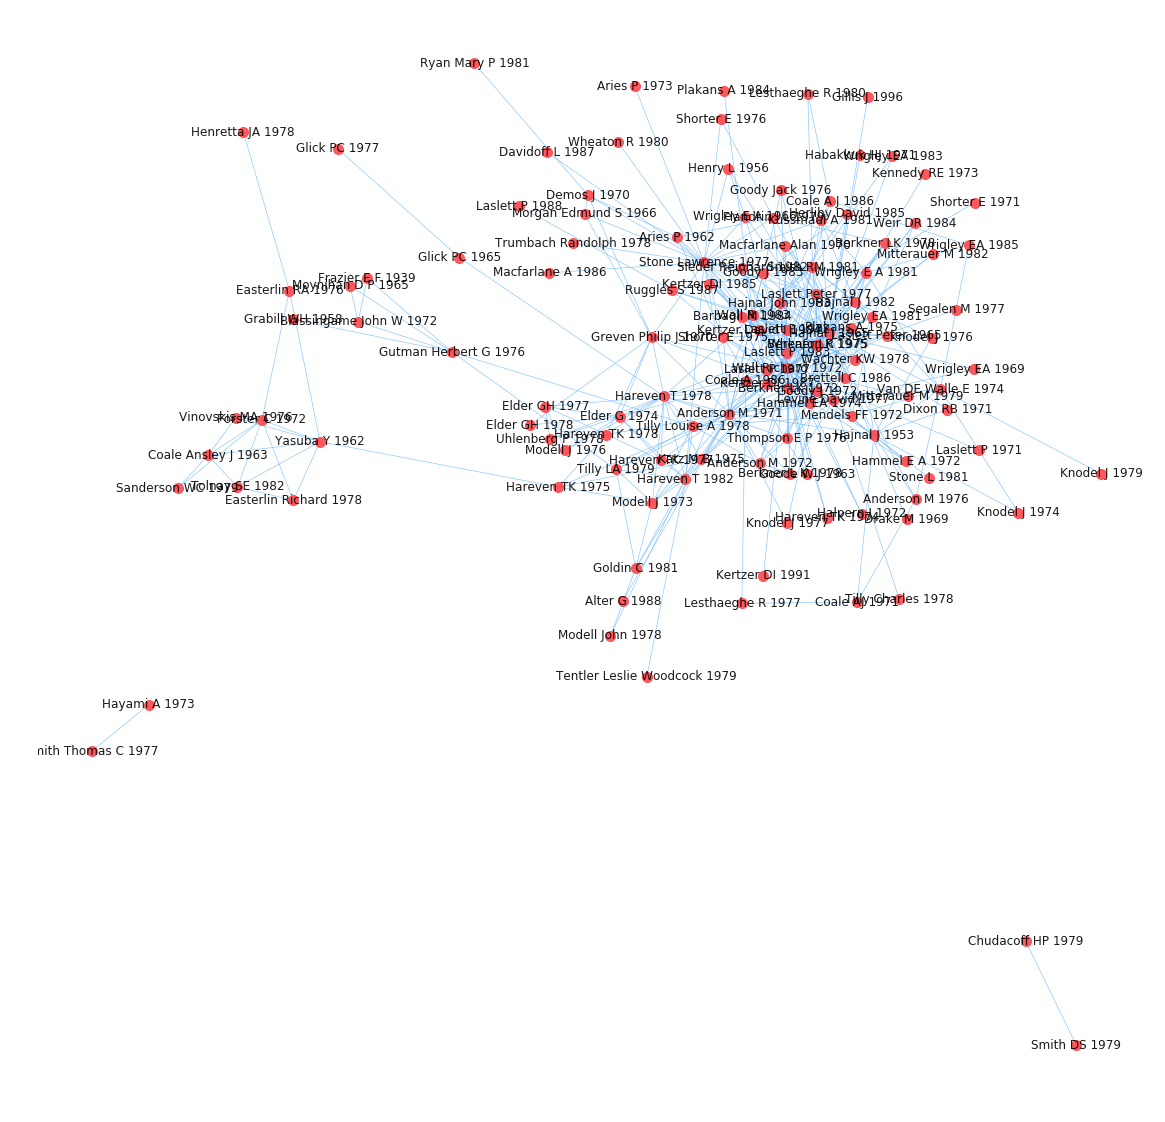

In [61]:
#Drawing the network
layout = nx.spring_layout(G, weight='weight', iterations= 15)
fig, ax = plt.subplots(figsize = (20,20))
nx.draw(G, ax = ax, pos = layout, labels = {n:n for n in G.nodes()},
        width=.6, 
        alpha = .9, 
        node_size = 100,
        k=0.5*1/np.sqrt(len(G.nodes())),
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue')

In [64]:
dcentralities = nx.degree_centrality(G)

In [65]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('Hajnal J 1965', 0.39370078740157477),
 ('Wall Richard 1972', 0.3779527559055118),
 ('Berkner LK 1972', 0.23622047244094488),
 ('Anderson M 1971', 0.22834645669291337),
 ('Stone Lawrence 1977', 0.2125984251968504),
 ('Wall R 1983', 0.1889763779527559),
 ('Laslett P 1972', 0.1653543307086614),
 ('Laslett P 1983', 0.15748031496062992),
 ('Laslett Peter 1977', 0.14173228346456693),
 ('Smith RM 1981', 0.14173228346456693)]

In [66]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('Wheaton R 1980', 0.007874015748031496),
 ('Henretta JA 1978', 0.007874015748031496),
 ('Laslett P 1988', 0.007874015748031496),
 ('Trumbach Randolph 1978', 0.007874015748031496),
 ('Ryan Mary P 1981', 0.007874015748031496),
 ('Gillis J 1996', 0.007874015748031496),
 ('Macfarlane A 1986', 0.007874015748031496),
 ('Kertzer DI 1991', 0.007874015748031496),
 ('Shorter E 1971', 0.007874015748031496),
 ('Tilly Charles 1978', 0.007874015748031496)]

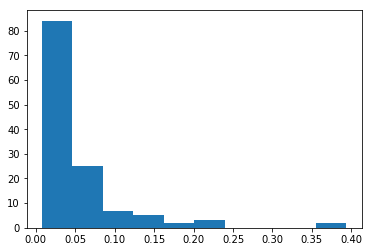

In [67]:
plt.hist(list(dcentralities.values()))
plt.show()

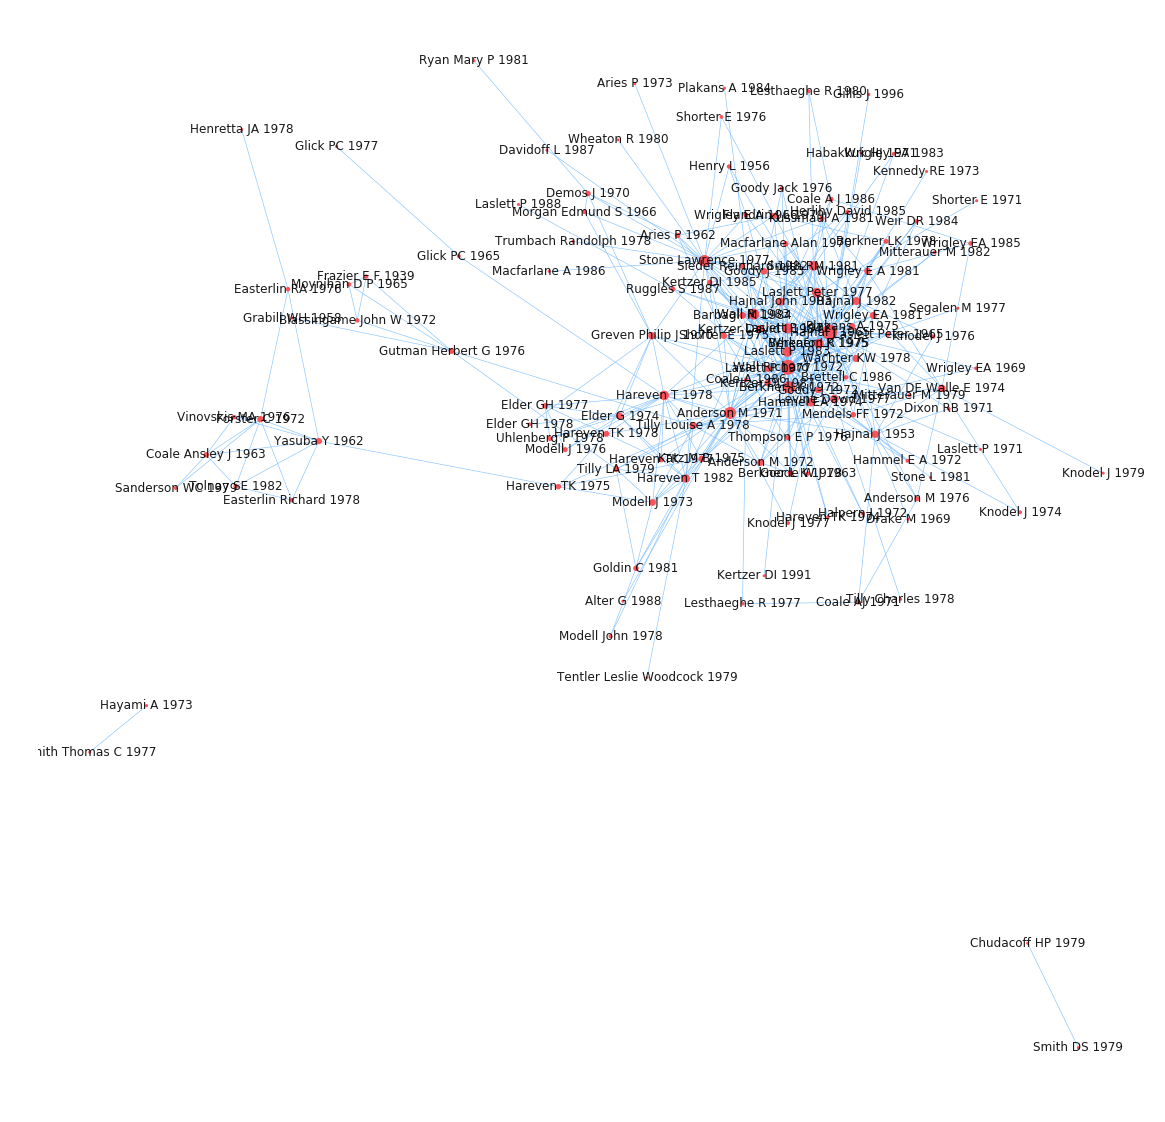

In [73]:
fig, ax = plt.subplots(figsize = (20,20))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
nx.draw(G, ax = ax, pos = layout, labels = {n:n for n in G.nodes()},
        width=.6, 
        alpha = .9,
        k = 0.5*1/np.sqrt(len(G.nodes())),
        node_size = [dcentralities[n] / maxC * 200 for n in G.nodes],
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue')

In [74]:
#Filtered to get just the most central nodes
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")    
        
    if rule=='number':# if filter by limiting the total number of nodes 
        
        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])
        
        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

In [82]:
#Picking out just the top 25 in terms of degree centrality
giant_filtered30 = filterWords(G, minWeight=3, filter_='degree', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 130
Average degree:  10.4000


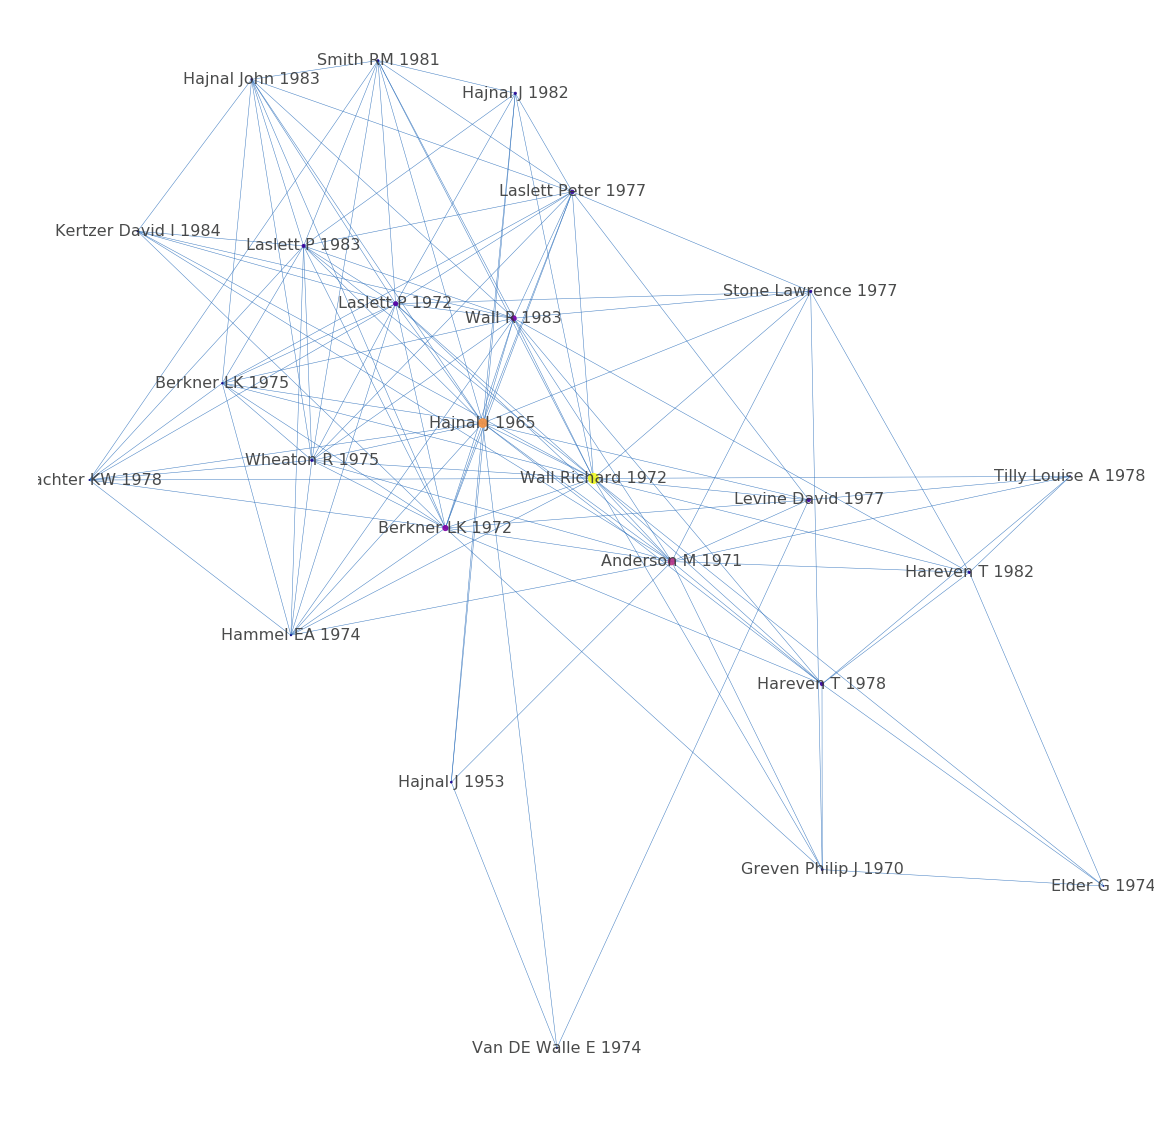

In [83]:

layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (20,20))
centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
        alpha = .9, 
        width = .5,
        
        node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
        node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [84]:
#Global density measure
nx.density(G)

0.05044291338582677

In [85]:
#Global average degree per node
np.mean([v for w,v in nx.degree(G)])

6.40625

In [93]:
#Libraries for exporting to D3.js
import json
import networkx as nx
from networkx.readwrite import json_graph
import re
import community #pip install python-louvain

In [94]:
partition=community.best_partition(G)

print (len(partition))

128


In [96]:

#for n in G:
#    G.node[n]['name'] = n
# write json formatted data
#d = json_graph.node_link_data(G) # node-link format to serialize
# write json
#json.dump(d, open('cites.json','w'))
#print('Wrote node-link JSON data to force/force.json')
#http_server.load_url('cites.html')
#print('Or copy all files in force/ to webserver and load force/force.html')



Wrote node-link JSON data to force/force.json


NameError: name 'http_server' is not defined

In [ ]:
#for node in G:    
#    G.add_node(node,freq=cite_dict[node], group=str(partition[node]))

#d3_js.export_d3_js(G,files_dir="netweb",graphname="cites",node_labels=True,group="group")

#fix=open('netweb/cites.json','rb').read()
#for n in G:
#    try:
#        fix=re.sub(str(n)+'''"''',str(n)+'''" , "nodeSize":'''+str(cite_dict[n]),fix)
#    except:
#        print 'error with',n
#f = open('netweb/cites.json', 'w+')
#f.write(fix)
#f.close()